### NOTE: Neither the lines of code nor text have been proofread and some of the writing have been taken directly from the OpenCV documentation

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Morphological Transformations

Consist of:

<ul>
    <li>Erosion</li>
    <li>Dilation</li>
    <li>Opening</li>
    <li>Closing</li>
    <li>Morphological Gradient</li>
    <li>Top Hat</li>
    <li>Black Hat</li>
</ul>

For details, see https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

### Image Gradients

These are the building blocks of edge detection in computer vision. OpenCV provides three types of gradient filters:

<ul>
    <li>Sobel</li>
    <li>Scharr</li>
    <li>Laplacian</li>
</ul>

For details, see https://docs.opencv.org/3.4/d5/d0f/tutorial_py_gradients.html

### Canny Edge Detection

This builds on image gradients; an example code is shown below; for details see https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

(<AxesSubplot:title={'center':'Edges'}>,
 Text(0.5, 1.0, 'Edges'),
 ([], []),
 ([], []))

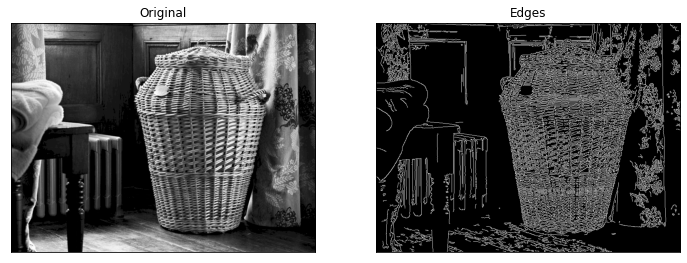

In [8]:
img = cv.imread('bank_images/test11.png', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img,100,200)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1),plt.imshow(img, cmap='gray'),plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges, cmap='gray'),plt.title('Edges'),plt.xticks([]),plt.yticks([])

### Image Pyramids

This is where you work with different resolutions of the same image. An example where this might be desirable is while searching for something in an image, like a face, and we are not sure at what size the object will be present in the said image. In that case, we will need to create a set of the same image with different resolutions and search for the object in all of them. These set of images with different resolutions are called 'image pyramids' (because when they are kept in a stack with the ***highest resolution image at the bottom and the lowest resolution image at top***, it looks like a pyramid, ***but remember that the direction you go matters!***).

There are two kinds of image pyramids:

<ol>
    <li>Gaussian Pyramid</li>
    <li>Laplacian Pyramids</li>
</ol>

Higher level (Low resolution) in a Gaussian Pyramid is formed by removing consecutive rows and columns in Lower level (higher resolution) image. Then each pixel in higher level is formed by the contribution from 5 pixels in underlying level with gaussian weights. By doing so, a ***M*** &times; ***N*** image becomes ***M/2*** &times; ***N/2*** image. So area reduces to one-fourth of original area. It is called an *octave*. The same pattern continues as we go upper in pyramid (i.e, resolution decreases). Similarly while expanding, area becomes 4 times in each level. We can find Gaussian pyramids using <code>cv.pyrDown()</code> and <code>cv.pyrUp()</code> functions.

Laplacian Pyramids are formed from the Gaussian Pyramids. There is no exclusive function for that. Laplacian pyramid images are like edge images only. Most of its elements are zeros. They are used in image compression. A level in Laplacian Pyramid is formed by the difference between that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid.

An example code utilising both styles is shown below:

```python
A = cv.imread('img1.jpg')
B = cv.imread('img2.jpg')
assert A is not None, "file could not be read, check with os.path.exists()"
assert B is not None, "file could not be read, check with os.path.exists()"

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
    
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
    
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
    
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
    
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
    
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
    
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
cv.imwrite('Pyramid_blending2.jpg',ls_)
cv.imwrite('Direct_blending.jpg',real)
```